In [1]:
import astropy
print(astropy.__version__)

from astropy import coordinates
from astropy import time
from astropy import units as u

import numpy as np
from scipy import optimize

1.3


In [2]:
%matplotlib inline

from matplotlib import pyplot as plt

from mpl_toolkits import mplot3d

In [3]:
def scatterproj(lon, lat, val, projection='hammer', cb=True):
    ax = plt.subplot(projection=projection)
    sc = ax.scatter(coordinates.Angle(lon).wrap_at(180*u.deg).rad, lat.to(u.radian).value, c=val, lw=0)
    
    if cb:
        plt.colorbar(sc)
    
    plt.xticks([])
    plt.yticks([])
    return ax

In [4]:
loc = coordinates.EarthLocation.of_site('Cerro Paranal') #VLT

In [5]:
t = time.Time(2457244.5, format='jd')
t.datetime

datetime.datetime(2015, 8, 10, 0, 0)

# Targets 

In [6]:
25*np.cos(np.linspace(-85, 85, 15)*u.deg)

<Quantity [  2.17889357,  7.36887936, 12.22912503, 16.54214594,
            20.11494449, 22.78764631, 24.44065422, 25.        ,
            24.44065422, 22.78764631, 20.11494449, 16.54214594,
            12.22912503,  7.36887936,  2.17889357]>

/home/eriktollerud/miniconda3/envs/anaconda/lib/python3.5/site-packages/matplotlib/projections/geo.py:394: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(1.0 - quarter_x*quarter_x - half_y*half_y)


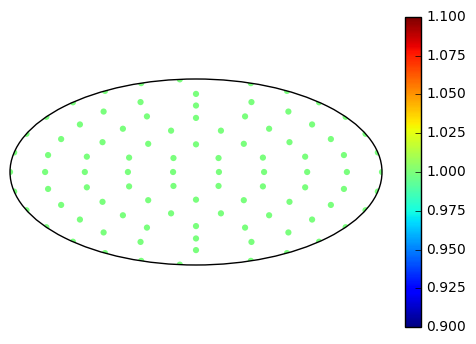

In [7]:
ras = []
decs = []

for dec in np.linspace(-85, 85, 15):
    ras1 = np.linspace(-180, 180-1e-6, np.round(10*np.cos(dec*u.deg)))
    ras.extend(ras1)
    decs.extend([dec]*len(ras1))
    
ras = ras*u.deg
decs = decs*u.deg

scatterproj(ras, decs, [1]*len(ras))

# Astropy-based function

In [8]:
# from vhelio calculation.ipynb

def helio_corr(t, loc, target=None):
    """
    The thing you add to a target to get the heliocentric velocity
    """
    vsun = coordinates.get_body_barycentric_posvel('sun', t)[1]
    vearth = coordinates.get_body_barycentric_posvel('earth', t)[1]

    vsunearth = vearth - vsun
    
    gcrs_p, gcrs_v = loc.get_gcrs_posvel(t)
    
    vsuntarg = (vsunearth.xyz + gcrs_v.xyz).to(u.km/u.s)
    if target is None:
        return vsuntarg
    else:
        gtarg = target.transform_to(coordinates.GCRS(obstime=t, obsgeoloc=gcrs_p))
        targxyz = gtarg.represent_as(coordinates.UnitSphericalRepresentation).to_cartesian().xyz
        return coordinates.matrix_utilities.matrix_product(vsuntarg, targxyz)

/home/eriktollerud/miniconda3/envs/anaconda/lib/python3.5/site-packages/matplotlib/projections/geo.py:394: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(1.0 - quarter_x*quarter_x - half_y*half_y)


<Quantity [-10.33399923,-14.19625711, -2.23685053,-14.19625701,
           -17.42318887,-17.12607882,  2.42411465,  2.12702575,
           -17.4231887 ,-19.87035261,-24.43613468,-11.01165514,
             6.97659735, 11.54140379, -1.88106641,-19.87035238,
           -21.428204  ,-27.66283803,-16.91002986,  2.73107618,
            16.46985845, 13.96300273, -2.90231907,-21.42820373,
           -22.02700519,-29.29592004,-21.47336365, -3.14326552,
            14.95532079, 22.22207123, 14.40175283, -3.92618067,
           -22.02700487,-21.63995021,-29.36758935,-24.19814541,
            -8.55145014, 10.2494327 , 23.4077275 , 24.76845031,
            13.69520755, -4.63253189,-21.63994988,-20.28436649,
           -28.18879135,-22.90108265, -6.89645524, 12.33446335,
            25.79369597, 27.18553579, 15.85904352, -2.88789952,
           -20.28436615,-18.02093803,-25.74838788,-20.57906534,
            -4.93274504, 13.86768479, 27.02566053, 28.38634751,
            17.31336938, -1.01393795,-18

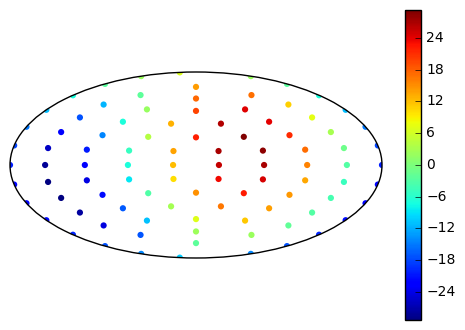

In [9]:
vhs_astropy = helio_corr(t, loc, coordinates.SkyCoord(ras, decs))

scatterproj(ras, decs, vhs_astropy, cb=True)
vhs_astropy

# Pytyhon xkeckhelio

using long/lat/alt instead of named observatory
using long/lat/alt instead of named observatory
using long/lat/alt instead of named observatory
using long/lat/alt instead of named observatory
using long/lat/alt instead of named observatory
using long/lat/alt instead of named observatory
using long/lat/alt instead of named observatory
using long/lat/alt instead of named observatory
using long/lat/alt instead of named observatory
using long/lat/alt instead of named observatory
using long/lat/alt instead of named observatory
using long/lat/alt instead of named observatory
using long/lat/alt instead of named observatory
using long/lat/alt instead of named observatory
using long/lat/alt instead of named observatory
using long/lat/alt instead of named observatory
using long/lat/alt instead of named observatory
using long/lat/alt instead of named observatory
using long/lat/alt instead of named observatory
using long/lat/alt instead of named observatory
using long/lat/alt instead of named obse

/home/eriktollerud/miniconda3/envs/anaconda/lib/python3.5/site-packages/matplotlib/projections/geo.py:394: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(1.0 - quarter_x*quarter_x - half_y*half_y)


<Quantity [ 10.34123819, 14.20399759,  2.24243487, 14.20399749,
            17.4311613 , 17.13746243, -2.41981453, -2.12611582,
            17.43116113, 19.8783213 , 24.44854122, 11.02248917,
            -6.97378288,-11.54400296,  1.88204897, 19.87832107,
            21.43597288, 27.67548702, 16.92283544, -2.72501594,
           -16.47283437,-13.96823222,  2.90277402, 21.43597261,
            22.0344148 , 29.30834054, 21.48713884,  3.15236355,
           -14.95572268,-22.22964858,-14.40844704,  3.92632819,
            22.03441449, 21.64686817, 29.37944434, 24.21205237,
             8.56257236,-10.2464301 ,-23.41401377,-24.77891993,
           -13.70249384,  4.63248167, 21.64686783, 20.29067479,
            28.20021774, 22.91456548,  6.90693341,-12.33252954,
           -25.80146489,-27.19760813,-15.86768833,  2.88689915,
            20.29067444, 18.02652115, 25.75909733, 20.59170535,
             4.94222534,-13.86677711,-27.03436078,-28.39926695,
           -17.32284086,  1.01213465, 18

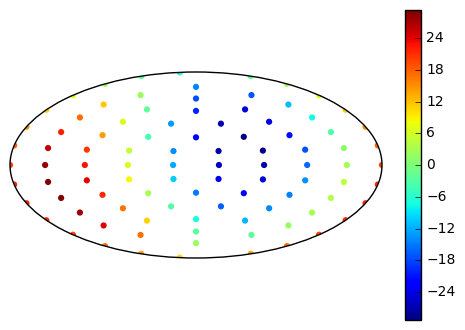

In [10]:
import erikutils.xkeckhelio

vhs_pyx = []
for ra, dec in zip(ras, decs):
    vh = erikutils.xkeckhelio.x_keckhelio(ra.value, dec.value, epoch=2000.0, jd=t.jd, tai=None, 
                                     longitude=loc.longitude.deg, latitude=loc.latitude.deg, 
                                     altitude=loc.geodetic[-1].to(u.m).value)
    vhs_pyx.append(vh[0])
vhs_pyx = vhs_pyx*u.km/u.s

scatterproj(ras, decs, vhs_pyx, cb=True)
vhs_pyx

# Now from IDL

In [11]:
print("ras=" + np.array2string(ras.value,separator=', ').replace('\n', ''))
print("decs=" + np.array2string(decs.value,separator=', ').replace('\n', ''))

msg = "for i=0,{maxi} do print,x_keckhelio(ras[i],decs[i],2000.0,jd={jd},tai=None,longitude={lon},latitude={lat},altitude={alt})"
print(msg.format(maxi=len(ras)-1, jd=t.jd, 
                 lon=loc.longitude.deg, lat=loc.latitude.deg, 
                 alt=loc.geodetic[-1].to(u.m).value))

ras=[ -1.80000000e+02,  -1.80000000e+02,  -4.99999999e-07,   1.79999999e+02,  -1.80000000e+02,  -9.00000002e+01,  -4.99999999e-07,   8.99999992e+01,   1.79999999e+02,  -1.80000000e+02,  -1.20000000e+02,  -6.00000003e+01,  -4.99999999e-07,   5.99999993e+01,   1.19999999e+02,   1.79999999e+02,  -1.80000000e+02,  -1.28571429e+02,  -7.71428574e+01,  -2.57142861e+01,   2.57142851e+01,   7.71428564e+01,   1.28571428e+02,   1.79999999e+02,  -1.80000000e+02,  -1.35000000e+02,  -9.00000002e+01,  -4.50000004e+01,  -4.99999999e-07,   4.49999994e+01,   8.99999992e+01,   1.34999999e+02,   1.79999999e+02,  -1.80000000e+02,  -1.40000000e+02,  -1.00000000e+02,  -6.00000003e+01,  -2.00000004e+01,   1.99999994e+01,   5.99999993e+01,   9.99999992e+01,   1.39999999e+02,   1.79999999e+02,  -1.80000000e+02,  -1.40000000e+02,  -1.00000000e+02,  -6.00000003e+01,  -2.00000004e+01,   1.99999994e+01,   5.99999993e+01,   9.99999992e+01,   1.39999999e+02,   1.79999999e+02,  -1.80000000e+02,  -1.40000000e+02,  -1.0

In [12]:
result = """
      10.289352
       14.028749
       2.4175051
       14.028749
       17.140389
       17.397473
      -2.1292053
      -2.3862894
       17.140389
       19.485039
       24.556553
       11.523713
      -6.5806401
      -11.652154
       1.3806856
       19.485039
       20.957779
       27.711793
       17.446262
      -2.1086633
      -16.227722
      -14.278978
       2.2701274
       20.957779
       21.492707
       29.267986
       21.971755
       3.8780459
      -14.414091
      -22.189371
      -14.893139
       3.2005695
       21.492707
       21.065886
       29.268510
       24.623064
       9.3032034
      -9.5227380
      -23.045893
      -24.938628
      -14.315310
       3.8532915
       21.065886
       19.696417
       28.086765
       23.335003
       7.6645345
      -11.592255
      -25.424900
      -27.360951
      -16.494510
       2.0898965
       19.696417
       17.445578
       25.648202
       21.002756
       5.6828955
      -13.143046
      -26.666201
      -28.558936
      -17.935618
      0.23298358
       17.445578
       14.414091
       22.189371
       14.893139
      -3.2005695
      -21.492707
      -29.267986
      -21.971755
      -3.8780459
       14.414091
       10.737608
       17.491622
       7.2260908
      -12.328834
      -26.447893
      -24.499148
      -7.9500434
       10.737608
       6.5806402
       11.652154
      -1.3806856
      -19.485039
      -24.556553
      -11.523713
       6.5806402
       2.1292054
       2.3862894
      -17.140389
      -17.397473
       2.1292054
      -2.4175051
      -14.028749
      -2.4175051
      -6.8560406
"""
vhs_idl = []
for line in result.strip().split():
    vhs_idl.append(float(line.strip()))

/home/eriktollerud/miniconda3/envs/anaconda/lib/python3.5/site-packages/matplotlib/projections/geo.py:394: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(1.0 - quarter_x*quarter_x - half_y*half_y)


<Quantity [ 10.289352  , 14.028749  ,  2.4175051 , 14.028749  ,
            17.140389  , 17.397473  , -2.1292053 , -2.3862894 ,
            17.140389  , 19.485039  , 24.556553  , 11.523713  ,
            -6.5806401 ,-11.652154  ,  1.3806856 , 19.485039  ,
            20.957779  , 27.711793  , 17.446262  , -2.1086633 ,
           -16.227722  ,-14.278978  ,  2.2701274 , 20.957779  ,
            21.492707  , 29.267986  , 21.971755  ,  3.8780459 ,
           -14.414091  ,-22.189371  ,-14.893139  ,  3.2005695 ,
            21.492707  , 21.065886  , 29.26851   , 24.623064  ,
             9.3032034 , -9.522738  ,-23.045893  ,-24.938628  ,
           -14.31531   ,  3.8532915 , 21.065886  , 19.696417  ,
            28.086765  , 23.335003  ,  7.6645345 ,-11.592255  ,
           -25.4249    ,-27.360951  ,-16.49451   ,  2.0898965 ,
            19.696417  , 17.445578  , 25.648202  , 21.002756  ,
             5.6828955 ,-13.143046  ,-26.666201  ,-28.558936  ,
           -17.935618  ,  0.23298358, 17

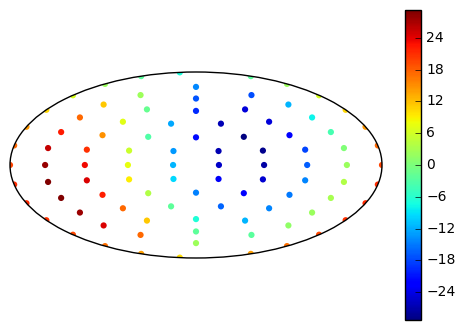

In [13]:
vhs_idl = vhs_idl*u.km/u.s

scatterproj(ras, decs, vhs_idl, cb=True)
vhs_idl

# Iraf rvcorrect 

In [14]:
dt = t.utc.datetime

for ra, dec in zip(ras, decs):
    rastr = coordinates.Angle(ra).to_string(u.hour, sep=':')
    decstr = coordinates.Angle(dec).to_string(u.deg, sep=':')
    print('{yr} {mo} {day} {uth}:{utmin} {ra} {dec}'.format(yr=dt.year, mo=dt.month, day=dt.day,
                                                            uth=dt.hour, utmin=dt.minute, 
                                                            ra=rastr, dec=decstr))

2015 8 10 0:0 -12:00:00 -85:00:00
2015 8 10 0:0 -12:00:00 -72:51:25.7143
2015 8 10 0:0 -0:00:00.0001 -72:51:25.7143
2015 8 10 0:0 11:59:59.9998 -72:51:25.7143
2015 8 10 0:0 -12:00:00 -60:42:51.4286
2015 8 10 0:0 -6:00:00.0001 -60:42:51.4286
2015 8 10 0:0 -0:00:00.0001 -60:42:51.4286
2015 8 10 0:0 5:59:59.9998 -60:42:51.4286
2015 8 10 0:0 11:59:59.9998 -60:42:51.4286
2015 8 10 0:0 -12:00:00 -48:34:17.1429
2015 8 10 0:0 -8:00:00 -48:34:17.1429
2015 8 10 0:0 -4:00:00.0001 -48:34:17.1429
2015 8 10 0:0 -0:00:00.0001 -48:34:17.1429
2015 8 10 0:0 3:59:59.9998 -48:34:17.1429
2015 8 10 0:0 7:59:59.9998 -48:34:17.1429
2015 8 10 0:0 11:59:59.9998 -48:34:17.1429
2015 8 10 0:0 -12:00:00 -36:25:42.8571
2015 8 10 0:0 -8:34:17.1429 -36:25:42.8571
2015 8 10 0:0 -5:08:34.2858 -36:25:42.8571
2015 8 10 0:0 -1:42:51.4287 -36:25:42.8571
2015 8 10 0:0 1:42:51.4284 -36:25:42.8571
2015 8 10 0:0 5:08:34.2855 -36:25:42.8571
2015 8 10 0:0 8:34:17.1427 -36:25:42.8571
2015 8 10 0:0 11:59:59.9998 -36:25:42.8571
2015

Write the above to <filename>, then in IRAF run

```
astutil
rvcorrect f=<filename> observatory=Paranal
```

In [15]:
result = """
# RVCORRECT: Observatory parameters for European Southern Observatory: Paranal
#       latitude = -24:37.5
#       longitude = 70:24.2
#       altitude = 2635
##   HJD          VOBS   VHELIO     VLSR   VDIURNAL   VLUNAR  VANNUAL   VSOLAR
2457244.50120     0.00   -10.36   -20.35     -0.034   -0.001  -10.325   -9.993
2457244.50025     0.00   -14.20   -23.86     -0.115   -0.004  -14.085   -9.656
2457244.50278     0.00    -2.29   -11.75      0.115    0.004   -2.413   -9.459
2457244.50025     0.00   -14.20   -23.86     -0.115   -0.004  -14.085   -9.656
2457244.49929     0.00   -17.41   -26.30     -0.192   -0.006  -17.214   -8.888
2457244.50317     0.00   -17.19   -17.44      0.078    0.001  -17.269   -0.253
2457244.50348     0.00     2.35    -6.21      0.192    0.006    2.156   -8.560
2457244.49959     0.00     2.13   -15.06     -0.078   -0.000    2.211  -17.194
2457244.49929     0.00   -17.41   -26.30     -0.192   -0.006  -17.214   -8.888
2457244.49835     0.00   -19.84   -27.56     -0.259   -0.008  -19.573   -7.721
2457244.50186     0.00   -24.47   -22.16     -0.038   -0.004  -24.433    2.313
2457244.50470     0.00   -11.11    -8.57      0.221    0.005  -11.332    2.534
2457244.50402     0.00     6.90    -0.38      0.259    0.008    6.629   -7.277
2457244.50051     0.00    11.53    -5.78      0.038    0.004   11.489  -17.311
2457244.49768     0.00    -1.84   -19.37     -0.221   -0.004   -1.612  -17.533
2457244.49835     0.00   -19.84   -27.56     -0.259   -0.008  -19.573   -7.721
2457244.49749     0.00   -21.38   -27.59     -0.315   -0.010  -21.056   -6.209
2457244.50109     0.00   -27.69   -22.90     -0.096   -0.006  -27.584    4.785
2457244.50457     0.00   -17.00    -9.30      0.196    0.003  -17.201    7.704
2457244.50532     0.00     2.62     2.97      0.340    0.009    2.276    0.349
2457244.50277     0.00    16.42     4.67      0.228    0.009   16.178  -11.741
2457244.49884     0.00    13.98    -5.48     -0.056    0.002   14.039  -19.463
2457244.49649     0.00    -2.84   -19.84     -0.297   -0.007   -2.533  -17.000
2457244.49749     0.00   -21.38   -27.59     -0.315   -0.010  -21.056   -6.209
2457244.49675     0.00   -21.97   -26.39     -0.357   -0.011  -21.598   -4.419
2457244.50025     0.00   -29.30   -22.47     -0.149   -0.008  -29.146    6.831
2457244.50398     0.00   -21.55    -9.88      0.146    0.001  -21.700   11.670
2457244.50577     0.00    -3.26     4.00      0.356    0.009   -3.623    7.263
2457244.50456     0.00    14.87    11.06      0.357    0.011   14.497   -3.808
2457244.50106     0.00    22.20     7.14      0.149    0.008   22.045  -15.058
2457244.49732     0.00    14.45    -5.44     -0.146   -0.001   14.600  -19.897
2457244.49554     0.00    -3.84   -19.33     -0.356   -0.008   -3.478  -15.491
2457244.49675     0.00   -21.97   -26.39     -0.357   -0.011  -21.598   -4.419
2457244.49615     0.00   -21.57   -24.00     -0.383   -0.012  -21.172   -2.432
2457244.49942     0.00   -29.36   -20.83     -0.193   -0.009  -29.157    8.527
2457244.50312     0.00   -24.26    -9.75      0.088   -0.001  -24.348   14.511
2457244.50552     0.00    -8.66     4.06      0.327    0.007   -8.996   12.721
2457244.50549     0.00    10.14    14.13      0.413    0.012    9.715    3.994
2457244.50305     0.00    23.35    15.76      0.306    0.011   23.031   -7.586
2457244.49933     0.00    24.78     8.18      0.056    0.006   24.721  -16.601
2457244.49609     0.00    13.77    -5.06     -0.221   -0.003   13.994  -18.832
2457244.49483     0.00    -4.53   -17.77     -0.394   -0.010   -4.131  -13.237
2457244.49615     0.00   -21.57   -24.00     -0.383   -0.012  -21.172   -2.432
2457244.49572     0.00   -20.20   -20.54     -0.392   -0.013  -19.799   -0.335
2457244.49907     0.00   -28.17   -17.30     -0.197   -0.009  -27.966   10.874
2457244.50285     0.00   -22.96    -5.96      0.090   -0.001  -23.048   16.995
2457244.50531     0.00    -7.00     8.16      0.335    0.007   -7.345   15.164
2457244.50528     0.00    12.23    18.47      0.423    0.012   11.795    6.238
2457244.50278     0.00    25.74    20.13      0.313    0.012   25.416   -5.607
2457244.49898     0.00    27.21    12.38      0.057    0.006   27.144  -14.829
2457244.49566     0.00    15.94    -1.17     -0.226   -0.003   16.172  -17.111
2457244.49437     0.00    -2.78   -14.17     -0.403   -0.010   -2.368  -11.387
2457244.49572     0.00   -20.20   -20.54     -0.392   -0.013  -19.799   -0.335
2457244.49548     0.00   -17.94   -16.16     -0.383   -0.012  -17.541    1.776
2457244.49875     0.00   -25.73   -12.99     -0.193   -0.009  -25.525   12.734
2457244.50246     0.00   -20.63    -1.91      0.088   -0.001  -20.716   18.719
2457244.50485     0.00    -5.03    11.90      0.327    0.007   -5.365   16.928
2457244.50482     0.00    13.77    21.97      0.413    0.012   13.347    8.202
2457244.50238     0.00    26.98    23.60      0.306    0.011   26.663   -3.378
2457244.49867     0.00    28.41    16.02      0.056    0.005   28.353  -12.393
2457244.49542     0.00    17.40     2.78     -0.221   -0.003   17.625  -14.625
2457244.49416     0.00    -0.90    -9.93     -0.394   -0.010   -0.499   -9.029
2457244.49548     0.00   -17.94   -16.16     -0.383   -0.012  -17.541    1.776
2457244.49544     0.00   -14.87   -11.06     -0.357   -0.011  -14.497    3.808
2457244.49894     0.00   -22.20    -7.14     -0.149   -0.008  -22.045   15.058
2457244.50268     0.00   -14.45     5.44      0.146    0.001  -14.600   19.897
2457244.50446     0.00     3.84    19.33      0.356    0.008    3.478   15.491
2457244.50325     0.00    21.97    26.39      0.357    0.011   21.598    4.419
2457244.49975     0.00    29.30    22.47      0.149    0.008   29.146   -6.831
2457244.49602     0.00    21.55     9.88     -0.146   -0.001   21.700  -11.670
2457244.49423     0.00     3.26    -4.00     -0.356   -0.009    3.623   -7.263
2457244.49544     0.00   -14.87   -11.06     -0.357   -0.011  -14.497    3.808
2457244.49561     0.00   -11.13    -5.46     -0.315   -0.010  -10.805    5.670
2457244.49921     0.00   -17.43    -0.77     -0.096   -0.006  -17.333   16.664
2457244.50269     0.00    -6.75    12.83      0.196    0.003   -6.949   19.583
2457244.50344     0.00    12.88    25.10      0.340    0.009   12.527   12.227
2457244.50089     0.00    26.67    26.80      0.228    0.009   26.430    0.137
2457244.49696     0.00    24.24    16.65     -0.056    0.002   24.290   -7.584
2457244.49461     0.00     7.42     2.29     -0.297   -0.007    7.719   -5.122
2457244.49561     0.00   -11.13    -5.46     -0.315   -0.010  -10.805    5.670
2457244.49598     0.00    -6.90     0.38     -0.259   -0.008   -6.629    7.277
2457244.49949     0.00   -11.53     5.78     -0.038   -0.004  -11.489   17.311
2457244.50232     0.00     1.84    19.37      0.221    0.004    1.612   17.533
2457244.50165     0.00    19.84    27.56      0.259    0.008   19.573    7.721
2457244.49814     0.00    24.47    22.16      0.038    0.004   24.433   -2.313
2457244.49530     0.00    11.11     8.57     -0.221   -0.005   11.332   -2.534
2457244.49598     0.00    -6.90     0.38     -0.259   -0.008   -6.629    7.277
2457244.49652     0.00    -2.35     6.21     -0.192   -0.006   -2.156    8.560
2457244.50041     0.00    -2.13    15.06      0.078    0.000   -2.211   17.194
2457244.50071     0.00    17.41    26.30      0.192    0.006   17.214    8.888
2457244.49683     0.00    17.19    17.44     -0.078   -0.001   17.269    0.253
2457244.49652     0.00    -2.35     6.21     -0.192   -0.006   -2.156    8.560
2457244.49722     0.00     2.29    11.75     -0.115   -0.004    2.413    9.459
2457244.49975     0.00    14.20    23.86      0.115    0.004   14.085    9.656
2457244.49722     0.00     2.29    11.75     -0.115   -0.004    2.413    9.459
2457244.49805     0.00     6.84    16.77     -0.034   -0.001    6.874    9.935
"""

vhs_iraf = []
for line in result.strip().split('\n'):
    if not line.strip().startswith('#'):
        vhs_iraf.append(float(line.split()[2]))

/home/eriktollerud/miniconda3/envs/anaconda/lib/python3.5/site-packages/matplotlib/projections/geo.py:394: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(1.0 - quarter_x*quarter_x - half_y*half_y)


<Quantity [-10.36,-14.2 , -2.29,-14.2 ,-17.41,-17.19,  2.35,  2.13,-17.41,
           -19.84,-24.47,-11.11,  6.9 , 11.53, -1.84,-19.84,-21.38,-27.69,
           -17.  ,  2.62, 16.42, 13.98, -2.84,-21.38,-21.97,-29.3 ,-21.55,
            -3.26, 14.87, 22.2 , 14.45, -3.84,-21.97,-21.57,-29.36,-24.26,
            -8.66, 10.14, 23.35, 24.78, 13.77, -4.53,-21.57,-20.2 ,-28.17,
           -22.96, -7.  , 12.23, 25.74, 27.21, 15.94, -2.78,-20.2 ,-17.94,
           -25.73,-20.63, -5.03, 13.77, 26.98, 28.41, 17.4 , -0.9 ,-17.94,
           -14.87,-22.2 ,-14.45,  3.84, 21.97, 29.3 , 21.55,  3.26,-14.87,
           -11.13,-17.43, -6.75, 12.88, 26.67, 24.24,  7.42,-11.13, -6.9 ,
           -11.53,  1.84, 19.84, 24.47, 11.11, -6.9 , -2.35, -2.13, 17.41,
            17.19, -2.35,  2.29, 14.2 ,  2.29,  6.84] km / s>

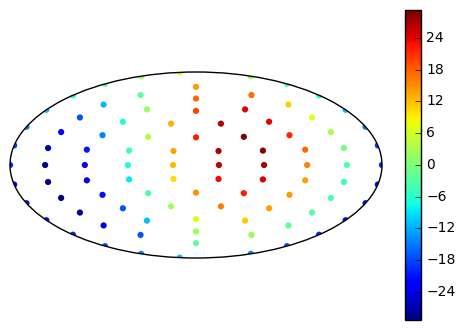

In [16]:
vhs_iraf = vhs_iraf*u.km/u.s

scatterproj(ras, decs, vhs_iraf, cb=True)
vhs_iraf

# Direct comparisons 

Note that the sign of the xkeckhlio's seems to be the opposite of what it should be, so we put negatives in to cancel that effect 

/home/eriktollerud/miniconda3/envs/anaconda/lib/python3.5/site-packages/matplotlib/projections/geo.py:394: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(1.0 - quarter_x*quarter_x - half_y*half_y)


<Quantity [  7.23896103e-03,  7.74048136e-03,  5.58433607e-03,
             7.74048131e-03,  7.97242911e-03,  1.13836087e-02,
             4.30012734e-03,  9.09925910e-04,  7.97242903e-03,
             7.96868756e-03,  1.24065493e-02,  1.08340372e-02,
             2.81447666e-03, -2.59916998e-03,  9.82562440e-04,
             7.96868746e-03,  7.76887981e-03,  1.26489908e-02,
             1.28055857e-02,  6.06023771e-03, -2.97592127e-03,
            -5.22949281e-03,  4.54950491e-04,  7.76887969e-03,
             7.40961245e-03,  1.24205085e-02,  1.37751966e-02,
             9.09803490e-03, -4.01889881e-04, -7.57734926e-03,
            -6.69420863e-03,  1.47513328e-04,  7.40961231e-03,
             6.91795115e-03,  1.18549968e-02,  1.39069564e-02,
             1.11222216e-02,  3.00259848e-03, -6.28626395e-03,
            -1.04696230e-02, -7.28628966e-03, -5.02194896e-05,
             6.91795100e-03,  6.30829689e-03,  1.14263943e-02,
             1.34828260e-02,  1.04781746e-02,  1.933806

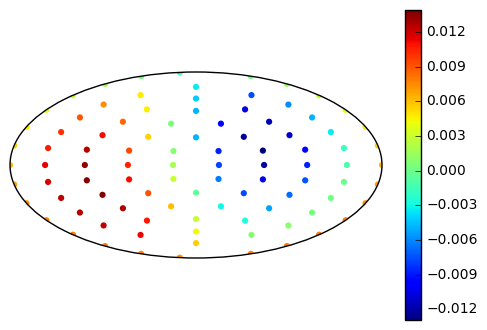

In [17]:
diff = vhs_astropy - -vhs_pyx

scatterproj(ras, decs, diff, cb=True)
diff

/home/eriktollerud/miniconda3/envs/anaconda/lib/python3.5/site-packages/matplotlib/projections/geo.py:394: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(1.0 - quarter_x*quarter_x - half_y*half_y)


<Quantity [-0.04464723,-0.16750811, 0.18065457,-0.16750801,-0.28279987,
            0.27139418, 0.29490935,-0.25926365,-0.2827997 ,-0.38531361,
            0.12041832, 0.51205786, 0.39595725,-0.11075021,-0.50038081,
           -0.38531338,-0.470425  , 0.04895497, 0.53623214, 0.62241288,
            0.24213645,-0.31597527,-0.63219167,-0.47042473,-0.53429819,
           -0.02793404, 0.49839135, 0.73478038, 0.54122979, 0.03270023,
           -0.49138617,-0.72561117,-0.53429787,-0.57406421,-0.09907935,
            0.42491859, 0.75175326, 0.7266947 , 0.3618345 ,-0.17017769,
           -0.62010245,-0.77924039,-0.57406388,-0.58794949,-0.10202635,
            0.43392035, 0.76807926, 0.74220835, 0.36879597,-0.17541521,
           -0.63546648,-0.79800302,-0.58794915,-0.57536003,-0.10018588,
            0.42369066, 0.75015046, 0.72463879, 0.35945953,-0.17258849,
           -0.62224862,-0.78095437,-0.57535969,-0.53689463,-0.03018086,
            0.49578121, 0.73131026, 0.5369045 , 0.02802796,-0.49

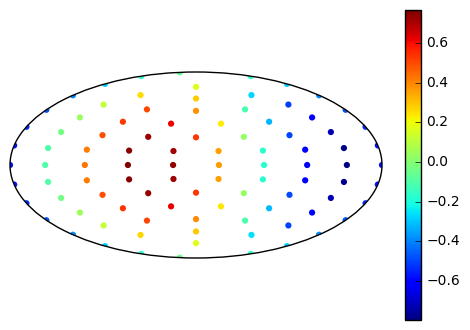

In [18]:
diff = vhs_astropy - -vhs_idl

scatterproj(ras, decs, diff, cb=True)
diff

/home/eriktollerud/miniconda3/envs/anaconda/lib/python3.5/site-packages/matplotlib/projections/geo.py:394: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(1.0 - quarter_x*quarter_x - half_y*half_y)


<Quantity [-0.05188619,-0.17524859, 0.17507023,-0.17524849,-0.2907723 ,
            0.26001057, 0.29060923,-0.26017358,-0.29077213,-0.3932823 ,
            0.10801178, 0.50122383, 0.39314278,-0.10815104,-0.50136337,
           -0.39328207,-0.47819388, 0.03630598, 0.52342656, 0.61635264,
            0.24511237,-0.31074578,-0.63264662,-0.47819361,-0.5417078 ,
           -0.04035454, 0.48461616, 0.72568235, 0.54163168, 0.04027758,
           -0.48469196,-0.72575869,-0.54170749,-0.58098217,-0.11093434,
            0.41101163, 0.74063104, 0.7236921 , 0.36812077,-0.15970807,
           -0.61281616,-0.77919017,-0.58098183,-0.59425779,-0.11345274,
            0.42043752, 0.75760109, 0.74027454, 0.37656489,-0.16334287,
           -0.62682167,-0.79700265,-0.59425744,-0.58094315,-0.11089533,
            0.41105065, 0.74067016, 0.72373111, 0.36815978,-0.15966905,
           -0.61277714,-0.77915107,-0.58094281,-0.54163183,-0.04027758,
            0.48469212, 0.72575891, 0.54170764, 0.04035455,-0.48

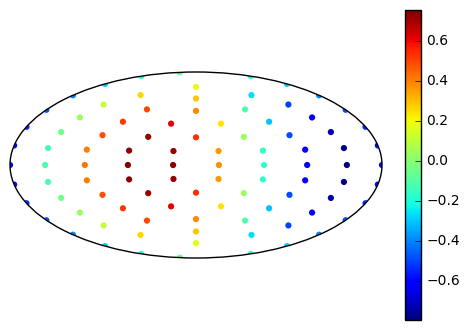

In [19]:
diff = vhs_idl - vhs_pyx
scatterproj(ras, decs, diff, cb=True)
diff

/home/eriktollerud/miniconda3/envs/anaconda/lib/python3.5/site-packages/matplotlib/projections/geo.py:394: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(1.0 - quarter_x*quarter_x - half_y*half_y)


<Quantity [-0.02600077,-0.00374289,-0.05314947,-0.00374299, 0.01318887,
           -0.06392118,-0.07411465, 0.00297425, 0.0131887 , 0.03035261,
           -0.03386532,-0.09834486,-0.07659735,-0.01140379, 0.04106641,
            0.03035238, 0.048204  ,-0.02716197,-0.08997014,-0.11107618,
           -0.04985845, 0.01699727, 0.06231907, 0.04820373, 0.05700519,
           -0.00407996,-0.07663635,-0.11673448,-0.08532079,-0.02207123,
            0.04824717, 0.08618067, 0.05700487, 0.06995021, 0.00758935,
           -0.06185459,-0.10854986,-0.1094327 ,-0.0577275 , 0.01154969,
            0.07479245, 0.10253189, 0.06994988, 0.08436649, 0.01879135,
           -0.05891735,-0.10354476,-0.10446335,-0.05369597, 0.02446421,
            0.08095648, 0.10789952, 0.08436615, 0.08093803, 0.01838788,
           -0.05093466,-0.09725496,-0.09768479,-0.04566053, 0.02365249,
            0.08663062, 0.11393795, 0.08093769, 0.08098563, 0.01955186,
           -0.05264221,-0.09187976,-0.0596115 , 0.00398604, 0.07

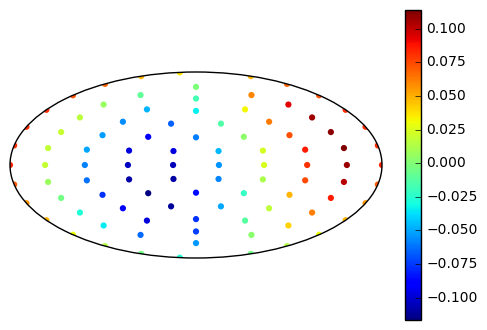

In [20]:
diff = vhs_iraf - vhs_astropy
scatterproj(ras, decs, diff, cb=True)
diff

/home/eriktollerud/miniconda3/envs/anaconda/lib/python3.5/site-packages/matplotlib/projections/geo.py:394: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(1.0 - quarter_x*quarter_x - half_y*half_y)


<Quantity [-0.070648  ,-0.171251  , 0.1275051 ,-0.171251  ,-0.269611  ,
            0.207473  , 0.2207947 ,-0.2562894 ,-0.269611  ,-0.354961  ,
            0.086553  , 0.413713  , 0.3193599 ,-0.122154  ,-0.4593144 ,
           -0.354961  ,-0.422221  , 0.021793  , 0.446262  , 0.5113367 ,
            0.192278  ,-0.298978  ,-0.5698726 ,-0.422221  ,-0.477293  ,
           -0.032014  , 0.421755  , 0.6180459 , 0.455909  , 0.010629  ,
           -0.443139  ,-0.6394305 ,-0.477293  ,-0.504114  ,-0.09149   ,
            0.363064  , 0.6432034 , 0.617262  , 0.304107  ,-0.158628  ,
           -0.54531   ,-0.6767085 ,-0.504114  ,-0.503583  ,-0.083235  ,
            0.375003  , 0.6645345 , 0.637745  , 0.3151    ,-0.150951  ,
           -0.55451   ,-0.6901035 ,-0.503583  ,-0.494422  ,-0.081798  ,
            0.372756  , 0.6528955 , 0.626954  , 0.313799  ,-0.148936  ,
           -0.535618  ,-0.66701642,-0.494422  ,-0.455909  ,-0.010629  ,
            0.443139  , 0.6394305 , 0.477293  , 0.032014  ,-0.42

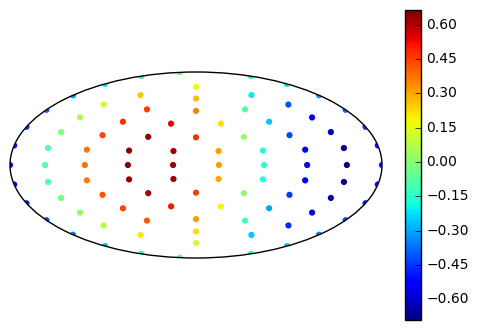

In [21]:
diff = vhs_iraf - -vhs_idl
scatterproj(ras, decs, diff, cb=True)
diff

/home/eriktollerud/miniconda3/envs/anaconda/lib/python3.5/site-packages/matplotlib/projections/geo.py:394: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(1.0 - quarter_x*quarter_x - half_y*half_y)


<Quantity [-0.01876181, 0.00399759,-0.04756513, 0.00399749, 0.0211613 ,
           -0.05253757,-0.06981453, 0.00388418, 0.02116113, 0.0383213 ,
           -0.02145878,-0.08751083,-0.07378288,-0.01400296, 0.04204897,
            0.03832107, 0.05597288,-0.01451298,-0.07716456,-0.10501594,
           -0.05283437, 0.01176778, 0.06277402, 0.05597261, 0.0644148 ,
            0.00834054,-0.06286116,-0.10763645,-0.08572268,-0.02964858,
            0.04155296, 0.08632819, 0.06441449, 0.07686817, 0.01944434,
           -0.04794763,-0.09742764,-0.1064301 ,-0.06401377, 0.00108007,
            0.06750616, 0.10248167, 0.07686783, 0.09067479, 0.03021774,
           -0.04543452,-0.09306659,-0.10252954,-0.06146489, 0.01239187,
            0.07231167, 0.10689915, 0.09067444, 0.08652115, 0.02909733,
           -0.03829465,-0.08777466,-0.09677711,-0.05436078, 0.01073305,
            0.07715914, 0.11213465, 0.08652081, 0.08572283, 0.02964858,
           -0.04155312,-0.08632841,-0.06441464,-0.00834055, 0.06

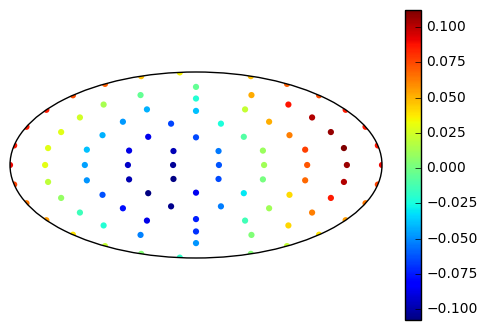

In [22]:
diff = vhs_iraf - -vhs_pyx
scatterproj(ras, decs, diff, cb=True)
diff